In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot
#*******
from itertools import combinations
from collections import Counter

##Merging 12 months sales data into one single file

In [2]:
root='/Users/mac/Desktop/DataScience/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data'
sales=pd.DataFrame()
files=['Sales_January_2019.csv','Sales_February_2019.csv','Sales_March_2019.csv','Sales_April_2019.csv',
      'Sales_May_2019.csv','Sales_June_2019.csv','Sales_July_2019.csv','Sales_August_2019.csv',
      'Sales_September_2019.csv','Sales_October_2019.csv','Sales_November_2019.csv','Sales_December_2019.csv']
for data in files:
    all_data=pd.read_csv(root+'/'+data)
    sales=pd.concat([all_data,sales])

In [3]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


# Making changes in data for the analysis

In [4]:
sales['Month']=sales['Order Date'].str[0:2]
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


#Removing nan

In [5]:
na_df=sales[sales.isna().any(axis=1)]
na_df
sales=sales.dropna(how='all')
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [6]:
sales['Month'].unique()

array(['12', 'Or', '01', '11', '10', '09', '08', '07', '06', '05', '04',
       '03', '02'], dtype=object)

#Removing Or

In [7]:
sales=sales[sales['Month']!='Or']

In [8]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [9]:
sales['Month'].unique()

array(['12', '01', '11', '10', '09', '08', '07', '06', '05', '04', '03',
       '02'], dtype=object)

In [10]:
sales['Month']=sales['Month'].astype('int') #converting months from object to int

In [11]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 9722
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 11.3+ MB


# Adding sales col.

In [12]:
sales['Quantity Ordered'].unique()

array(['1', '2', '4', '3', '7', '5', '6', '8', '9'], dtype=object)

In [13]:
sales['Quantity Ordered']=sales['Quantity Ordered'].astype('int32')

In [14]:
sales['Price Each']=sales['Price Each'].astype('float')

In [15]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 9722
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int32  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int64  
dtypes: float64(1), int32(1), int64(1), object(4)
memory usage: 10.6+ MB


In [16]:
sales['Sales']=sales['Quantity Ordered']*sales['Price Each']

In [17]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


In [18]:
sales1=sales.groupby('Month').sum()
sales1

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


Creating a new col for city

In [19]:
sales['Purchase Address'].unique()

array(['136 Church St, New York City, NY 10001',
       '562 2nd St, New York City, NY 10001',
       '277 Main St, New York City, NY 10001', ...,
       '214 Main St, Portland, OR 97035',
       '810 2nd St, Los Angeles, CA 90001',
       '428 Cedar St, Boston, MA 02215'], dtype=object)

In [20]:
city=[]
for x in sales['Purchase Address']:
    cities=x.split(',')[1]
    city.append(cities)    
sales['City']=city   
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta


In [21]:
sales_city=sales.groupby('City').sum()
sales_city

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta,16602,2.779908e+06,104794,2.795499e+06
Austin,11153,1.809874e+06,69829,1.819582e+06
Boston,22528,3.637410e+06,141112,3.661642e+06
Dallas,16730,2.752628e+06,104620,2.767975e+06
Los Angeles,33289,5.421435e+06,208325,5.452571e+06
New York City,27932,4.635371e+06,175741,4.664317e+06
Portland,14053,2.307747e+06,87765,2.320491e+06
San Francisco,50239,8.211462e+06,315520,8.262204e+06
Seattle,16553,2.733296e+06,104941,2.747755e+06


Converting date using data time method in pandas so to make it universal

In [22]:
sales['Order Date']=pd.to_datetime(sales['Order Date'])

In [23]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta


In [24]:
sales['Hour']=sales['Order Date'].dt.hour
sales['Minute']=sales['Order Date'].dt.minute
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,38


# For the duplicate order id - (for task 4th)

In [25]:
#using .duplicated method
duplicate_id=sales[sales['Order ID'].duplicated(keep=False)]
duplicate_id

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,Boston,12,37
17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.95,Boston,12,37
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,99.99,Boston,12,37
19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.99,Boston,12,37
36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,New York City,14,32
...,...,...,...,...,...,...,...,...,...,...,...
9540,150323,Apple Airpods Headphones,1,150.00,2019-01-15 23:31:00,"381 Wilson St, San Francisco, CA 94016",1,150.00,San Francisco,23,31
9552,150335,iPhone,1,700.00,2019-01-01 14:32:00,"956 Madison St, Los Angeles, CA 90001",1,700.00,Los Angeles,14,32
9553,150335,Apple Airpods Headphones,1,150.00,2019-01-01 14:32:00,"956 Madison St, Los Angeles, CA 90001",1,150.00,Los Angeles,14,32
9652,150433,Flatscreen TV,1,300.00,2019-01-18 22:27:00,"736 Chestnut St, San Francisco, CA 94016",1,300.00,San Francisco,22,27


In [26]:
#grouping together the group id to get the values
duplicate_id['Grouped']= duplicate_id.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
duplicate_id

<ipython-input-26-679448232ee2>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped
16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,Boston,12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.95,Boston,12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,99.99,Boston,12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.99,Boston,12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,New York City,14,32,"Vareebadd Phone,USB-C Charging Cable"
...,...,...,...,...,...,...,...,...,...,...,...,...
9540,150323,Apple Airpods Headphones,1,150.00,2019-01-15 23:31:00,"381 Wilson St, San Francisco, CA 94016",1,150.00,San Francisco,23,31,"Google Phone,USB-C Charging Cable,Apple Airpod..."
9552,150335,iPhone,1,700.00,2019-01-01 14:32:00,"956 Madison St, Los Angeles, CA 90001",1,700.00,Los Angeles,14,32,"iPhone,Apple Airpods Headphones"
9553,150335,Apple Airpods Headphones,1,150.00,2019-01-01 14:32:00,"956 Madison St, Los Angeles, CA 90001",1,150.00,Los Angeles,14,32,"iPhone,Apple Airpods Headphones"
9652,150433,Flatscreen TV,1,300.00,2019-01-18 22:27:00,"736 Chestnut St, San Francisco, CA 94016",1,300.00,San Francisco,22,27,"Flatscreen TV,Google Phone"


In [27]:
#removing the duplicates
duplicate_id=duplicate_id[['Order ID','Grouped']].drop_duplicates()
duplicate_id.head()

,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


# Q1. What was the best month for the sales? How much was earned that month?

Doing EDA on sales to know which month sales were better

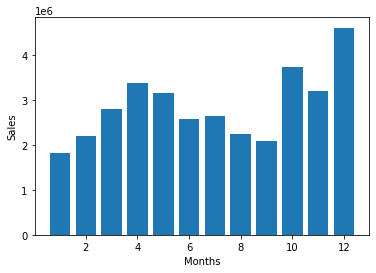

In [28]:
plt.bar(sales1.index,sales1['Sales'])
plt.xlabel('Months')
plt.ylabel("Sales")
plt.show()

From the graph it is been seen that December is the month where there is maximum sales..It might be because of variuos festivals and also due to holidays

# Q2. Which city has the highest number of sales ?

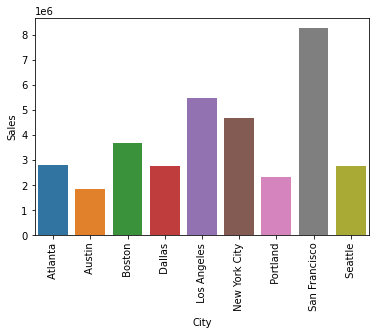

In [33]:
g=sns.barplot(sales_city.index,sales_city['Sales'],data=sales)
g.set_xticklabels(rotation=90,labels=sales_city.index);

From the graph it shows that the city "San Francisco" is the city which has the highest number of sales.

# Q3 At what time we should display advertisments to maximize the likelihood of customers buying product?

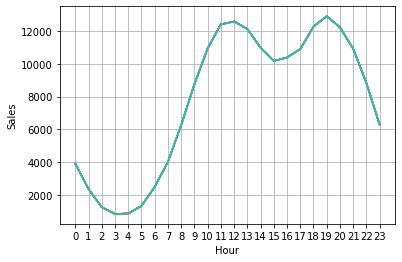

In [30]:
hour=[hour for hour, df in sales.groupby('Hour')]
plt.plot(hour,sales.groupby('Hour').count());
plt.xticks(hour)
plt.xlabel("Hour")
plt.ylabel("Sales")
plt.grid()

The graph shows that at 11am and 6-9pm the likelihood of buying the product is maximum. Hence we should display advertisments accordingly.

# Q4 What products are most often sold together?

In [31]:
count=Counter()
for row in duplicate_id['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))
for key,value in count.most_common(10):
    print(key,":",value)

('iPhone', 'Lightning Charging Cable') : 1005
('Google Phone', 'USB-C Charging Cable') : 987
('iPhone', 'Wired Headphones') : 447
('Google Phone', 'Wired Headphones') : 414
('Vareebadd Phone', 'USB-C Charging Cable') : 361
('iPhone', 'Apple Airpods Headphones') : 360
('Google Phone', 'Bose SoundSport Headphones') : 220
('USB-C Charging Cable', 'Wired Headphones') : 160
('Vareebadd Phone', 'Wired Headphones') : 143
('Lightning Charging Cable', 'Wired Headphones') : 92


# Q5 What product was sold the most ? Why do you think it does?

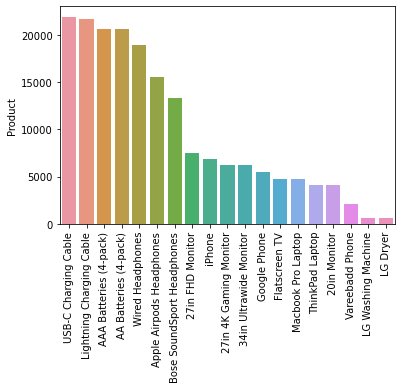

In [36]:
product=sales['Product'].value_counts()
h=sns.barplot(product.index,product,data=sales)
h.set_xticklabels(rotation=90,labels=product.index);